In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO

model = YOLO("hand_segmentation_best.pt")


predict = model.predict("hand.jpg" , save = True , save_txt = True)



image 1/1 C:\Users\batuh\hand_segmentation\hand.jpg: 640x640 1 hand, 279.8ms
Speed: 3.9ms preprocess, 279.8ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict5
1 label saved to runs\segment\predict5\labels


In [108]:
import numpy as np
import cv2

from ultralytics import YOLO

# Yolov8'i yükleyin
model = YOLO('hand_segmentation_best.pt')

# Görüntüyü yükleyin
results = model('hand.jpg',save = True)


image 1/1 C:\Users\batuh\hand_segmentation\hand.jpg: 640x640 1 hand, 269.9ms
Speed: 3.0ms preprocess, 269.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict13


In [110]:
result = results[0]

In [111]:
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes', 'masks']
masks: ultralytics.engine.results.Masks object
names: {0: 'hand'}
orig_img: array([[[164, 175, 173],
        [163, 174, 172],
        [162, 173, 171],
        ...,
        [137, 140, 138],
        [134, 137, 135],
        [132, 135, 133]],

       [[163, 174, 172],
        [162, 173, 171],
        [161, 172, 170],
        ...,
        [130, 133, 131],
        [127, 130, 128],
        [126, 129, 127]],

       [[163, 174, 172],
        [162, 173, 171],
        [161, 172, 170],
        ...,
        [121, 124, 122],
        [120, 123, 121],
        [119, 122, 120]],

       ...,

       [[139, 156, 195],
        [138, 155, 194],
        [139, 156, 195],
        ...,
        [ 60,  56, 212],
        [ 60,  56, 212],
        [ 59,  55, 211]],

       [[136, 153, 192],
        [136, 153, 192],
        [137, 154, 193],
        ...,
        [ 60,  

In [112]:
masks = result.masks

In [113]:
len(masks)

1

In [114]:
mask1 = masks[0]


In [115]:
mask = mask1.data[0].numpy()
polygon = mask1.xy[0]

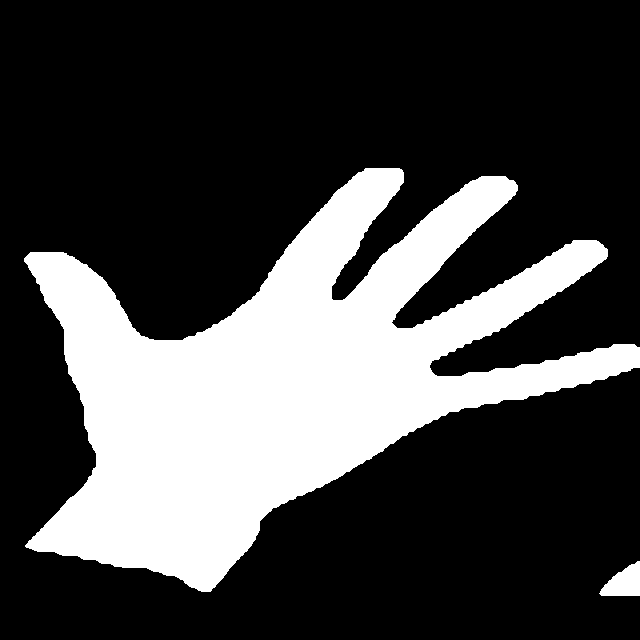

In [116]:
from PIL import Image
mask_img = Image.fromarray(mask,"I")
mask_img

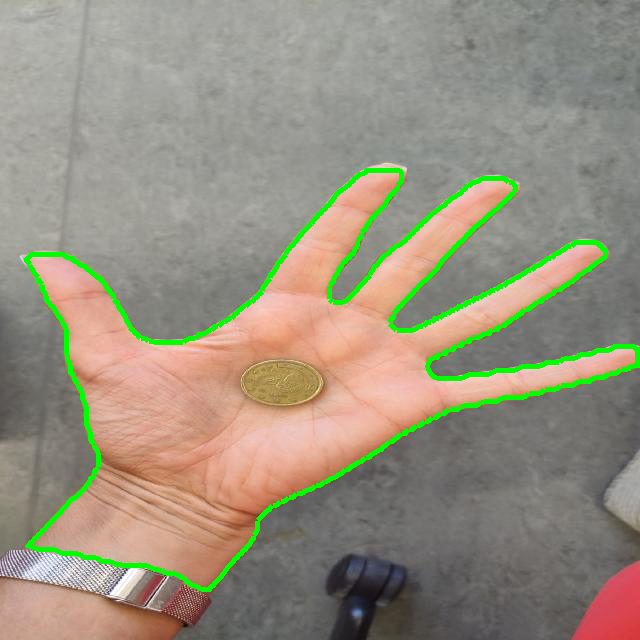

In [118]:
from PIL import ImageDraw

img = Image.open("hand.jpg")
draw = ImageDraw.Draw(img)
draw.polygon(polygon,outline=(0,255,0), width=5)
img

In [120]:

from ultralytics import YOLO
model = YOLO('hand_segmentation_best.pt')
results = model.predict(
    source='hand.jpg',
    conf=0.5,
    save=True
    )


image 1/1 C:\Users\batuh\hand_segmentation\hand.jpg: 640x640 1 hand, 278.7ms
Speed: 2.0ms preprocess, 278.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict8


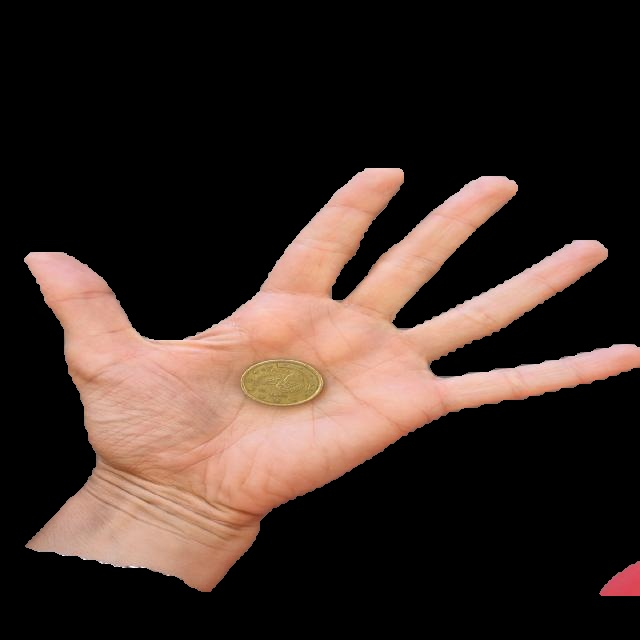

In [121]:
from IPython.display import Image

if(results[0].masks is not None):
    # Convert mask to single channel image
    mask_raw = results[0].masks[0].cpu().data.numpy().transpose(1, 2, 0)

    # Convert single channel grayscale to 3 channel image
    mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

    # Get the size of the original image (height, width, channels)
    h2, w2, c2 = results[0].orig_img.shape

    # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
    mask = cv2.resize(mask_3channel, (w2, h2))

    # Convert BGR to HSV
    hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

    # Define range of brightness in HSV
    lower_black = np.array([0,0,0])
    upper_black = np.array([0,0,1])

    # Create a mask. Threshold the HSV image to get everything black
    mask = cv2.inRange(mask, lower_black, upper_black)

    # Invert the mask to get everything but black
    mask = cv2.bitwise_not(mask)

    # Apply the mask to the original image
    masked = cv2.bitwise_and(results[0].orig_img, results[0].orig_img, mask=mask)

    # Show the masked part of the image
    cv2.imwrite('result.jpg',  masked)

Image(filename='result.jpg',height=800, width=800)
     